In [1]:
from pathlib import Path
import pandas as pd
import json
import matplotlib.pyplot as plt

# Create the dataframe

In [2]:
data_path = Path('/Users/roberttk/gh_loc/data/repo_loc_info_230423.json')
with open(data_path, 'r') as f:
    data = json.load(f)

lang_set = set()
for repo in data.values():
    for lang in repo:
        if not isinstance(lang, dict):
            continue
        lang_set.add(lang['language'])

lang_detail_columns = set(lang.keys())
lang_detail_columns.remove('language')

index = pd.MultiIndex.from_product([lang_set, lang_detail_columns],names=['language', 'info'])
df = pd.DataFrame(index=index, columns=data.keys())

# fill out information
for reponame, info in data.items():
    for data_dict in info:
        if isinstance(data_dict, str):
            continue
        for data_key, value in data_dict.items():
            if data_key == 'language':
                continue

            df.loc[(data_dict['language'], data_key), reponame] = value

In [3]:
df.head()

all-deployed-iocs epics-config lcls-twincat-motion   
language info                                                             
Python   blanks                      9           15                   7  \
         comments                    2            0                   1   
         linesOfCode                99           30                  26   
         lines                     110           45                  34   
         files                       2            5                   1   

                       atef  nabs tc-release lucid pcdsdevices lightpath   
language info                                                              
Python   blanks        1043   247         40   215        2978       425  \
         comments      1822   491         45   276        3470       837   
         linesOfCode  16174  3538        523  1953       35966      2932   
         lines        19039  4276        608  2444       42414      4194   
         files           58    22          5    14         148        24   

                      pytmc  ...   sxr TcStaticAnalysisLoader pymps   
language info                ...                                      
Python   blanks         396  ...   268                    NaN   NaN  \
         comments       449  ...   505                    NaN   NaN   
         linesOfCode  10211  ...  1995                    NaN   NaN   
         lines        11056  ...  2768                    NaN   NaN   
         files           40  ...    31                    NaN   NaN   

                     sim_beamline SDS_test time_zero QDarkStyleSheet   
language info                                                          
Python   blanks                68       37       NaN             363  \
         comments             119       49       NaN             484   
         linesOfCode          708      855       NaN           19048   
         lines                895      941       NaN           19895   
         files                  8        3       NaN              58   

                     skywalker-docs SebastianSlackBot mfxRobotVal3  
language info                                                       
Python   blanks                 NaN                33          NaN  
         comments               NaN                43          NaN  
         linesOfCode            NaN               294          NaN  
         lines                  NaN               370          NaN  
         files                  NaN                 3          NaN  

[5 rows x 293 columns]

# Example Queries

In [4]:
#: to get a repo's information
print(df['pcdsdevices'].dropna().to_string())

language          info       
Python            blanks          2978
                  comments        3470
                  linesOfCode    35966
                  lines          42414
                  files            148
JSON              blanks             0
                  comments           0
                  linesOfCode        1
                  lines              1
                  files              1
BASH              blanks             3
                  comments           2
                  linesOfCode        5
                  lines             10
                  files              1
Total             blanks          3877
                  comments        3493
                  linesOfCode    39797
                  lines          47167
                  files            187
Markdown          blanks            45
                  comments           0
                  linesOfCode      152
                  lines            197
                  files           

/var/folders/91/rlnvp0jx0k38f1bb_srbk_fn472fqf/T/ipykernel_31994/3181602797.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sum_df.drop(labels='Total', inplace=True)
/var/folders/91/rlnvp0jx0k38f1bb_srbk_fn472fqf/T/ipykernel_31994/3181602797.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


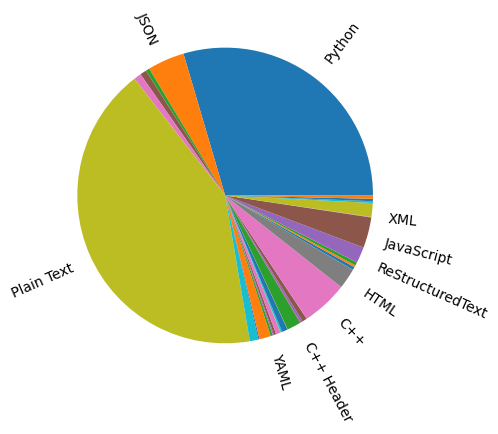

In [26]:
#: flatten on reponame
# Sum across columns
sum_df = df.sum(axis=1, skipna=True)
# drop total
sum_df.drop(labels='Total', inplace=True)
total_loc = sum_df.sum()
# Plot as piechart
fig, ax = plt.subplots()
lang_names = sum_df.index.get_level_values('language').unique()
values = sum_df.loc[(slice(None), "linesOfCode")] 
labels = [f'{name}' if sum_df.loc[(name, "linesOfCode")]/total_loc > 0.005 else '' 
          for name in lang_names]

patches, texts = ax.pie(sum_df.loc[(slice(None),'linesOfCode')], labels=labels,
                        rotatelabels=True)
patches, labels, dummy =  zip(*sorted(zip(patches, labels, values),
                                        key=lambda x: x[2],
                                        reverse=True))

fig.show()

In [15]:
sum_df.sum()

4267460

In [32]:
# pick a language and sort repos highest to lowest
lang = 'C++'
print(f'Top 20 {lang} repos by lines of code')
df.loc[lang, 'linesOfCode'].dropna().sort_values(ascending=False).head(10).to_clipboard()

Top 20 C++ repos by lines of code


In [16]:
10166/4267460

0.00238221330721319

In [29]:
# Top 5 languages, by LOC
# Sum across columns
sum_df = df.sum(axis=1, skipna=True)
# drop total
sum_df.drop(labels='Total', inplace=True)

sum_df[(slice(None), 'linesOfCode')].sort_values(ascending=False).head(20)


/var/folders/91/rlnvp0jx0k38f1bb_srbk_fn472fqf/T/ipykernel_31994/2632062198.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sum_df.drop(labels='Total', inplace=True)


language
Plain Text          784694
Python              550070
C++                  94294
JSON                 75028
JavaScript           62236
HTML                 41661
ReStructuredText     32501
XML                  28176
C++ Header           28155
YAML                 23327
Batch                17604
Markdown             14720
Jupyter              13054
C Header             11564
C                     9669
Shell                 9216
BASH                  7663
gitignore             6559
Go                    6206
SVG                   5975
dtype: object

In [ ]:
# number of languages per repo